# Earthquake uncertainty estimation using bootstrap # 

The earthquake location is determined using \verb|np.linalg.lstsq| to acquire a least squares solution. The forward calculation consists of determining the distance between the earthquake location and the receiving stations  using $distance =\sqrt{x^2+y^2+z^2}$. As such, the problem is non-linear and the solution is determined iteratively. We use a homogeneous crustal Earth model with wave speed, v=5.8 km/s. Using the Bootstrap approach, subsets of data are created and the procedure is repeated for each to enable an uncertainty and covariance estimation.



Problem details: 
- Model: Earthquake location ``x, y, z`` in km and origin time ``t_0`` in seconds after 16:30
- Data: Travel times ``t`` to recording stations
- Forward: Non-linear; $time = \frac{distance}{velocity}$, with $distance =\sqrt{x^2+y^2+z^2}$
- Solver: Linear least squares using \verb|np.linalg.lstsq|
- Over-determined (more recordings than unknowns)
- 3-dimensional
- Iterative: Yes
- Focus on uncertainty calculation using Bootstrap (parameter estimation using random subsets of data.



Code details:
- Initialise the problem: ``from InversionTestProblems import Earthquake_Bootstrap as eql_fcn``. Makes the subsequent functions available.
- ``eql_basics=eql_fcn.Earthquake()`` initialises a ``basics`` class object that contains the recorded data (i.e. travel times to recording locations) and the following changeable parameters. Setting these parameters is optional:
    - eql_basics.model: Specify start guess for earthquake location (3x1; float) 
    - eql_basics.nBoot: Specify number of bootstrap calculations (single integer), i.e. taking a subset of data and inverting for the model.
- ``model = eql_fcn.init_routine(eql_basics)`` initialises a starting model, if it has not been set previously.
-``synthetic, gradient = eql_fcn.forward(eql_basics, model)`` creates synthetic data based on the model and source and receiver locations. A gradient is not needed here and ''gradient'' is returned as an empty variable. 
- ``result = eql_fcn.solver(eql_basics, model, synthetic, gradient)`` performs the inversion.
- ``eql_fcn.plot_model(eql_basics, result)`` plots the result.


Earthquake location (iterative least square solution):
 [7.554340136266301, 47.21934668511463, -10.0]
Event time (seconds after 16:30) 40.1000936374443


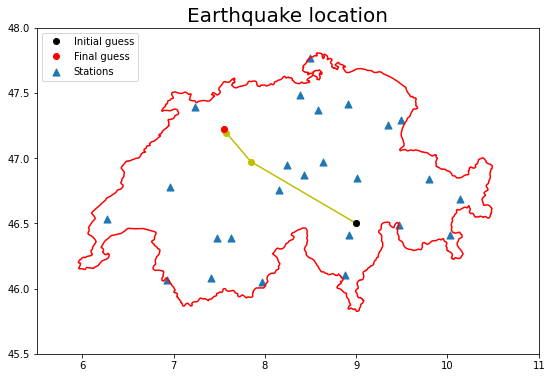

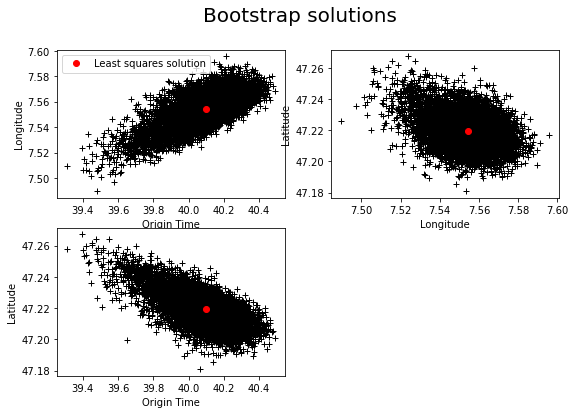

 Bootstrap mean earthquake location:
 [ 40.10575905   7.56208745  47.2175749  -10.        ]
 Bootstrap mean event time (seconds after 16:30):
 21.18595906060638
 Bootstrap covariance:
 [[ 2.26156572e-02  1.22418049e-03 -9.52683850e-04  0.00000000e+00]
 [ 1.22418049e-03  1.41388959e-04 -3.98791216e-05  0.00000000e+00]
 [-9.52683850e-04 -3.98791216e-05  9.57647839e-05  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]]
 Bootstrap bias corrected solution:
 [ 40.09720745   7.55416462  47.21966246 -10.        ]
 Bootstrap 95% Confidence intervals: 
 Parameter 1  40.097 [ 39.733,  40.344]
 Parameter 2   7.554 [  7.527,   7.575]
 Parameter 3  47.220 [ 47.202,  47.241]


In [1]:
from Earthquake_Bootstrap_data import Earthquake_Bootstrap as eql_fcn
eql_basics=eql_fcn.Earthquake()
eql_basics.model = [9, 46.5, -10.0, 40] # Start earthquake location
eql_basics.nBoot=10000 # Number of bootstrap subsets / iterations
model = eql_fcn.init_routine(eql_basics)
synthetic, gradient = eql_fcn.forward(eql_basics, model)
result = eql_fcn.solver(eql_basics, model, synthetic, gradient)
eql_fcn.plot_model(eql_basics, result)